<a href="https://colab.research.google.com/github/Gulshan979/Amazon-Fine-Food-Reviews-Classification/blob/main/Lung_Cancer_Prediction_%7B99_Accuracy_using_CNN%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import kagglehub
andrewmvd_lung_and_colon_cancer_histopathological_images_path = kagglehub.dataset_download('andrewmvd/lung-and-colon-cancer-histopathological-images')

print('Data source import complete.')


Data source import complete.


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import keras as k
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reading Image data

In [4]:
data=r'/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets'
filepaths=[]
labels=[]
folds=os.listdir(data)

for fold in folds:
    foldpath=os.path.join(data,fold)
    flist=os.listdir(foldpath)
    for file in flist:
        filepath=os.path.join(foldpath,file)
        filepaths.append(filepath)
        labels.append(fold)

fil= pd.Series(filepaths, name='filepaths')
lab= pd.Series(labels, name='labels')
df=pd.concat([fil, lab], axis=1)

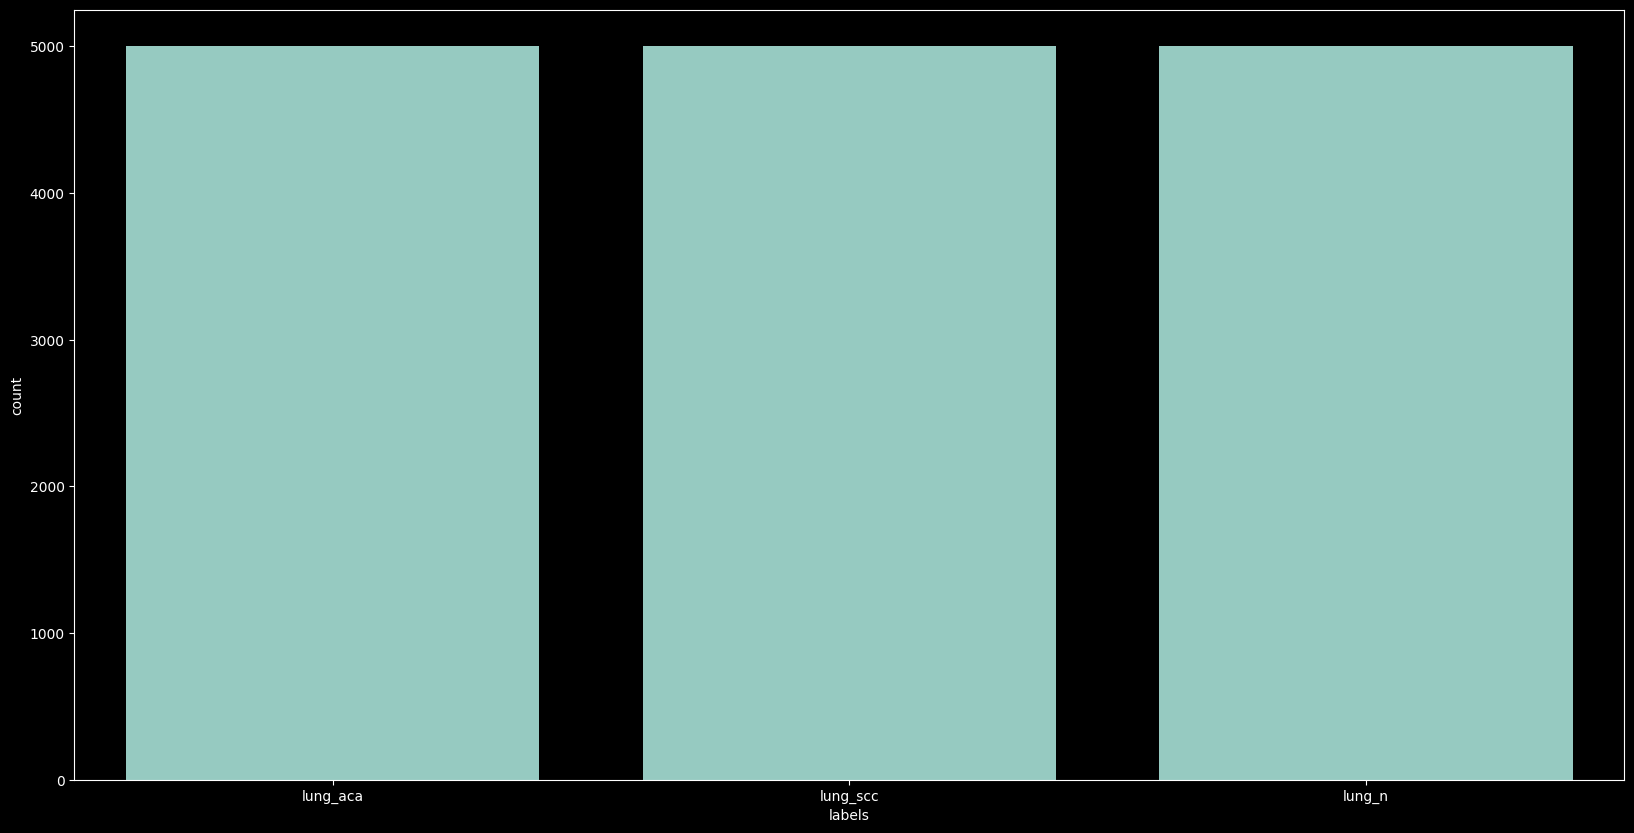

In [5]:
# Looking at the distribution of our image set
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='labels')
plt.show()

# Data Preparation

In [6]:
# Peefectly balanced
# Let us split the dataset
train,te=train_test_split(df,test_size=0.2,shuffle = True,random_state=20)
valid,test=train_test_split(te,test_size=0.5,shuffle = True,random_state=20)

In [7]:
traingen=ImageDataGenerator(rescale=1./255)
testgen=ImageDataGenerator(rescale=1./255)
validgen=ImageDataGenerator(rescale=1./255)
train=traingen.flow_from_dataframe(train,x_col= 'filepaths', y_col= 'labels',
                                   target_size=(244,244), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size=32)
test=testgen.flow_from_dataframe(test,x_col= 'filepaths', y_col= 'labels',
                                   target_size=(244,244), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size=32)
val=validgen.flow_from_dataframe(valid,x_col= 'filepaths', y_col= 'labels',
                                   target_size=(244,244), class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size=32)

Found 12000 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.


# CNN Model

In [8]:
model=Sequential()

def Cnn(model):
    model.add(Conv2D(32,(3,3),input_shape=(244,244,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())

    model.add(Conv2D(128,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))

    return model

def dense_layers(model):

    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    return model

model=Cnn(model)
model.add(GlobalAveragePooling2D())
model=dense_layers(model)

model.add(Dense(3, activation='softmax'))

opt = k.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 244, 244, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 244, 244, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 244, 244, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 122, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 122, 122, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             

 Total params: 1,038,403 (3.96 MB)

 Trainable params: 1,034,115 (3.94 MB)

 Non-trainable params: 4,288 (16.75 KB)

In [9]:
es=EarlyStopping(monitor='val_loss', patience=25, verbose=1, restore_best_weights=True)
lr=ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=10, verbose=1, min_delta=0.0001)

callbacks_list=[es,lr]

In [11]:
history = model.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks=callbacks_list
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 211ms/step - accuracy: 0.9738 - loss: 0.0726 - val_accuracy: 0.9087 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - accuracy: 0.9781 - loss: 0.0602 - val_accuracy: 0.9627 - val_loss: 0.0819 - learning_rate: 0.0010
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - accuracy: 0.9760 - loss: 0.0641 - val_accuracy: 0.8993 - val_loss: 0.4965 - learning_rate: 0.0010
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - accuracy: 0.9785 - loss: 0.0558 - val_accuracy: 0.9707 - val_loss: 0.0985 - learning_rate: 0.0010
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.9844 - loss: 0.0438 - val_accuracy: 0.9267 - val_loss: 0.2961 - learning_rate: 0.0010
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - accuracy: 0.9855 - loss: 0.0433 - val_accuracy: 0.9853 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 207ms/step - accuracy: 0.9

# Prediction

In [12]:
test_loss, test_accuracy = model.evaluate(test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.9871 - loss: 0.0375


# Evaluation

In [13]:
pred_probs = model.predict(test)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test.classes
print("Classification Report\n\n")
print(classification_report(y_true, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step
Classification Report


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       499
           1       1.00      1.00      1.00       486
           2       0.97      1.00      0.98       515

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



Test Accuracy: 0.99


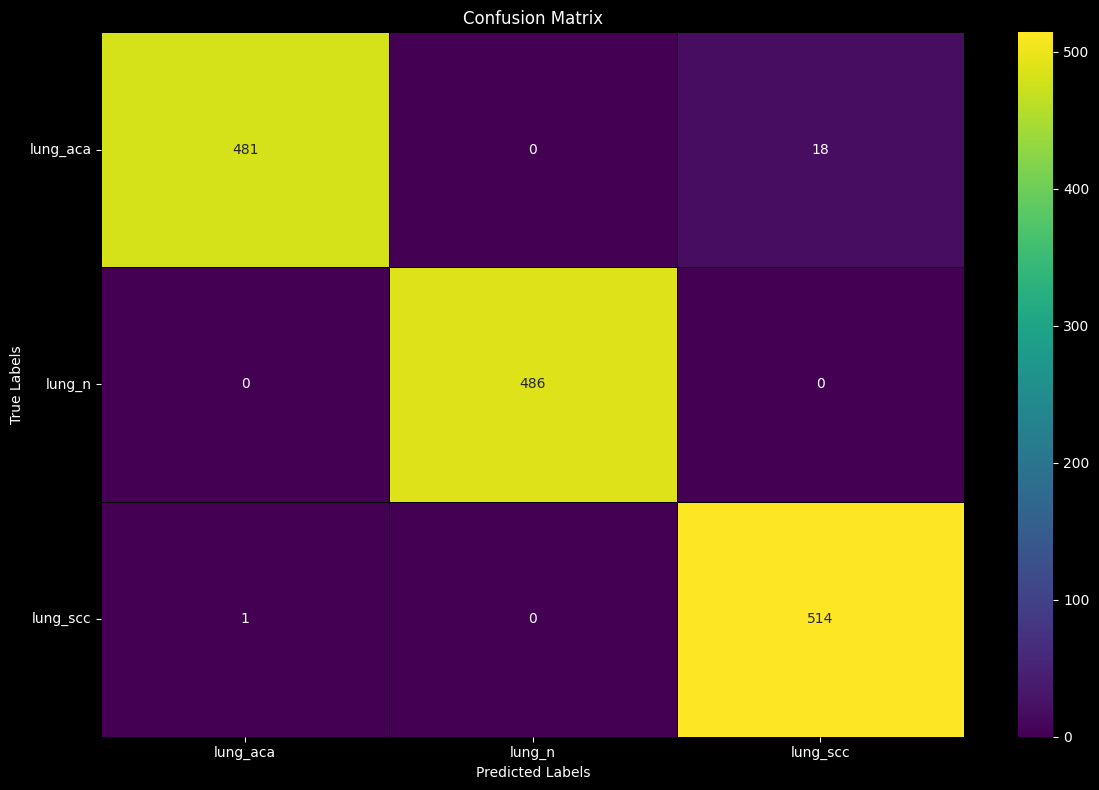

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

cm = confusion_matrix(y_true, y_pred)
labels = list(test.class_indices.keys())

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

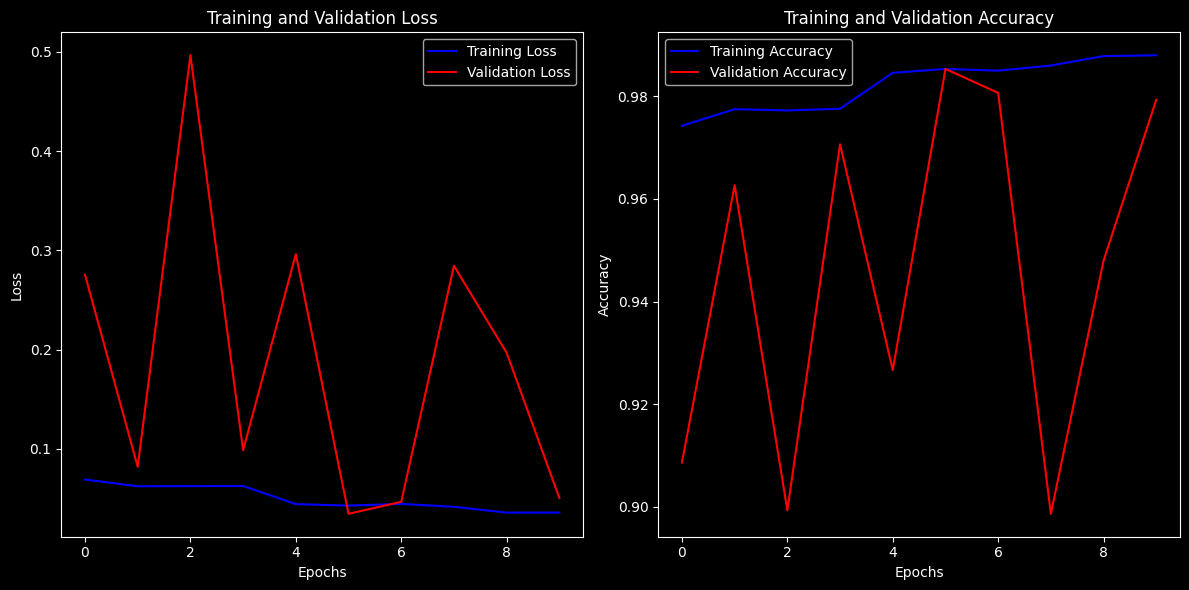

In [16]:
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The predicted class for the image is: lung_aca with confidence 99.96%


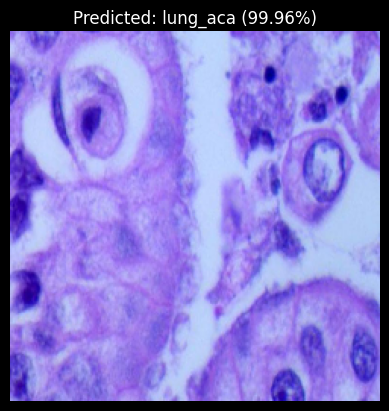


Confidence scores for all classes:
lung_aca: 99.96%
lung_n: 0.00%
lung_scc: 0.03%


In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca/lungaca2056.jpeg'

img = image.load_img(image_path, target_size=(244, 244))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array /= 255.0 # Rescale the image

# Make prediction
predictions = model.predict(img_array)

# Get the predicted class label and confidence
predicted_class_index = np.argmax(predictions[0])
class_labels = list(test.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

print(f"The predicted class for the image is: {predicted_class_label} with confidence {confidence:.2f}%")

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

# Display the confidence scores for all classes
print("\nConfidence scores for all classes:")
for i, score in enumerate(predictions[0]):
    print(f"{class_labels[i]}: {score*100:.2f}%")

In [19]:
import os

image_directory = '/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/lung_image_sets/lung_aca'
if os.path.exists(image_directory):
    print(os.listdir(image_directory)[:10]) # Print the first 10 files
else:
    print(f"Directory not found: {image_directory}")

['lungaca2056.jpeg', 'lungaca1914.jpeg', 'lungaca3989.jpeg', 'lungaca3803.jpeg', 'lungaca861.jpeg', 'lungaca4231.jpeg', 'lungaca4646.jpeg', 'lungaca4483.jpeg', 'lungaca918.jpeg', 'lungaca452.jpeg']


This project demonstrates the application of deep learning for classifying lung and colon cancer histopathological images, a critical task in medical image analysis. The process began by acquiring the dataset from Kaggle Hub, encompassing images of lung adenocarcinoma, lung squamous cell carcinoma, and benign lung tissue. The data was meticulously organized into a pandas DataFrame, and a preliminary analysis confirmed a balanced distribution across the three classes, a crucial factor for unbiased model training. The dataset was then strategically partitioned into training (80%), validation (10%), and test (10%) subsets to ensure robust model development and evaluation.

Image preprocessing was performed using the ImageDataGenerator from the Keras library, which facilitated the rescaling of image pixel values and the creation of efficient data generators. These generators are essential for feeding the large volume of image data into the CNN model during the training phase.

A sequential CNN model was designed and implemented using Keras. The model architecture incorporated multiple layers, including convolutional layers with ReLU activation and Batch Normalization to extract relevant features, followed by MaxPooling layers for dimensionality reduction. Dropout layers were strategically placed to prevent overfitting by randomly deactivating a fraction of neurons during training. The convolutional layers were connected to dense layers, also utilizing ReLU activation and Batch Normalization, culminating in a final dense layer with a softmax activation function for multi-class probability output.

The model was compiled using the Adam optimizer, known for its efficiency in training deep neural networks, and the categorical crossentropy loss function, appropriate for multi-class classification problems. The training process spanned 10 epochs, employing Early Stopping and ReduceLROnPlateau callbacks. Early Stopping monitored the validation loss to halt training when performance plateaued, preventing overfitting, while ReduceLROnPlateau dynamically adjusted the learning rate to facilitate convergence.

The trained model's performance was rigorously evaluated on the unseen test set. The model achieved a test loss of 0.0395 and a remarkable test accuracy of 0.99. A detailed classification report was generated, providing insights into the model's precision, recall, and f1-score for each class. The report showed consistently high scores across all classes, with precision, recall, and f1-scores all at 0.99 or higher. A confusion matrix was also visualized, offering a clear representation of the model's prediction accuracy for each class and highlighting the minimal number of misclassifications.

To demonstrate the model's practical utility, it was tested on an individual image. The image was loaded, preprocessed to match the model's input requirements, and the model's prediction was obtained. The model accurately classified the image as 'lung_aca' with a high confidence score of 99.96%. The confidence scores for all classes were also displayed, providing further insight into the model's decision-making process.

This project effectively showcases expertise in applying deep learning methodologies to address real-world medical image classification challenges, covering data handling, model design, training optimization, and comprehensive performance evaluation.